In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
titanic = sns.load_dataset('titanic')

In [8]:
titanic 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [51]:
titanic.survived.value_counts(normalize=True)*100

survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

<Axes: xlabel='survived', ylabel='count'>

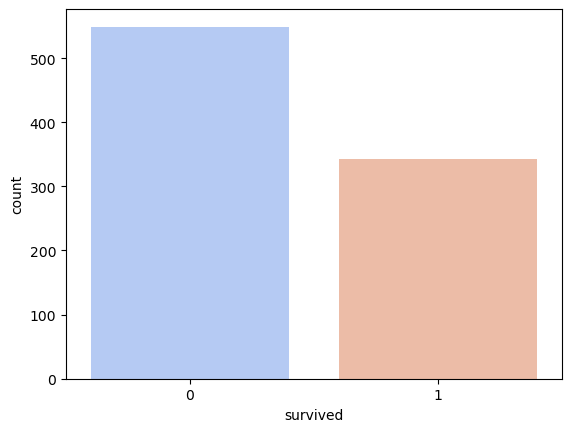

In [160]:
sns.countplot(x='survived', data=titanic, palette='coolwarm')

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [98]:
titanic.shape

(891, 15)

In [46]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
titanic[titanic.age.isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [18]:
titanic.age.fillna(titanic.age.median(),inplace=True)

In [19]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Deck Nan

In [21]:
titanic[titanic.deck.isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,28.0,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [31]:
titanic['deck'].fillna(titanic['deck'].mode()[0], inplace=True)


In [32]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

### embarked NaN

In [38]:
titanic[titanic.embarked.isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [40]:
titanic.embarked.fillna(titanic.embarked.mode()[0],inplace=True)

In [41]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

### embark_town NaN

In [43]:
titanic[titanic.embark_town.isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,S,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,S,First,woman,False,B,NaN,yes,True


In [44]:
titanic.embark_town.fillna(titanic.embark_town.mode()[0],inplace=True)

In [45]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

## Encoding categorical variable 'sex'

In [58]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [57]:
from sklearn.preprocessing import OneHotEncoder

In [66]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

## Data Split

In [135]:
X = titanic[['pclass','sex','age','fare']]
y = titanic['survived']
 # Encoding categorical variable 'sex'
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X[['sex']])
X_final = np.concatenate([X[['pclass','age','fare']].values, X_encoded], axis=1)

In [137]:
from sklearn.model_selection import train_test_split 

In [138]:
X_train,X_test,y_train,y_test = train_test_split(X_final,y,test_size=0.2,random_state=42)

In [139]:
print("X_train shape :",X_train.shape)
print("y_train shape :",y_train.shape)

print('-'*30)

print("X_test shape :",X_test.shape)
print("y_test shape :",y_test.shape)

X_train shape : (712, 4)
y_train shape : (712,)
------------------------------
X_test shape : (179, 4)
y_test shape : (179,)


## Model Buliding

In [140]:
from sklearn.linear_model import LogisticRegression

In [141]:
lr =LogisticRegression()
lr

LogisticRegression()

In [142]:
lr.fit(X_train,y_train)

LogisticRegression()

In [143]:
y_pred_lr =lr.predict(X_test)

In [144]:
pd.DataFrame(y_pred_lr,columns=['Predicted'])

,Predicted
0,0
1,0
2,0
3,1
4,1
...,...
174,0
175,0
176,1
177,1


In [145]:
pd.DataFrame(y_test)

,survived
709,1
439,0
840,0
720,1
39,1
...,...
433,0
773,0
25,1
84,1


In [146]:
from sklearn.tree import DecisionTreeClassifier

In [147]:
dt = DecisionTreeClassifier(max_depth=3,random_state=42)

In [148]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [149]:
y_pred_dt = dt.predict(X_test)

In [150]:
pd.DataFrame(y_pred_dt,columns=['Predicted'])

,Predicted
0,0
1,0
2,0
3,1
4,1
...,...
174,0
175,0
176,0
177,1


In [151]:
pd.DataFrame(y_test)

,survived
709,1
439,0
840,0
720,1
39,1
...,...
433,0
773,0
25,1
84,1


## Evaluate Model

In [152]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score

In [156]:
print("Logistic Regression accuracy_score : ",accuracy_score(y_test,y_pred_lr))
print("Decision Tree accuracy_score : ",accuracy_score(y_test,y_pred_dt))
print('-'*80)
print("Logistic Regression f1_score : ",f1_score(y_test,y_pred_lr))


Logistic Regression accuracy_score :  0.8044692737430168
Decision Tree accuracy_score :  0.7988826815642458
--------------------------------------------------------------------------------
Logistic Regression f1_score :  0.7552447552447552


In [157]:
print("Confusion Metrix :\n ",confusion_matrix(y_test,y_pred_dt))

Confusion Metrix :
  [[92 13]
 [23 51]]


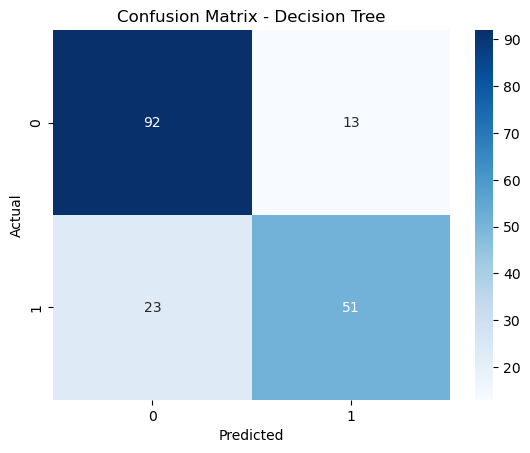

In [155]:
#Confusion Matrix Heatmap for Decision Tree
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()